## Cleaning the Tweets
Before we can do the sentiment analysis, we need to clean the tweets, as the data is still very messy. In this notebook, we will showcase how we cleaned our tweets and the tweet text. For this, we  made use of the regular expression, NLTK and pandas modules.

In [23]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import nltk
import seaborn as sns

# Load needed data
df = pd.read_csv('General_tweets_2021_until17_FNL.csv')

# Remove unnecesary columns
df = df.drop('follower_count', 1)
df = df.drop('statuses_count', 1)
df = df.drop('retweet_count', 1)
df = df.drop('favorite_count', 1)

# Inspect the data
df.shape
df.head(10)

,id,created_at,screen_name,location,text
0,1.370000e+18,Tue Mar 16 23:59:54 +0000 2021,Rechtsevrouwen,Ergens in Nederland,Kom kom zo’n powervrouw van #D66 kan toch wel ...
1,1.370000e+18,Tue Mar 16 23:59:53 +0000 2021,dewoordspeling,NaN,Gert-Jan Seegers van de ChristenUnie had voor ...
2,1.370000e+18,Tue Mar 16 23:59:36 +0000 2021,Rorma31,NaN,Ik #stem na in 2017 op #CDA gestemd te hebben ...
3,1.370000e+18,Tue Mar 16 23:59:35 +0000 2021,Rob4005,Tiel Nederland,Bij de plannen van GroenLinks groeien bomen ni...
4,1.370000e+18,Tue Mar 16 23:59:16 +0000 2021,KaagPremier,Jeruzalem Palestina,Op het Museumplein in Amsterdam verzamelen zic...
5,1.370000e+18,Tue Mar 16 23:59:05 +0000 2021,RenseSijbesma,Dronrijp,ga stemmen morgen mensen en stem #FVD
6,1.370000e+18,Tue Mar 16 23:58:46 +0000 2021,PascalyLilia,México,Langere wachttijden voor een woning geen betaa...
7,1.370000e+18,Tue Mar 16 23:58:38 +0000 2021,KGvIttersum,Overijssel Nederland,Gisteren liepen er 4 hazen in 't weiland. De v...
8,1.370000e+18,Tue Mar 16 23:58:11 +0000 2021,Thomas_Keirse,Gent België,Er zouden 3000 inzendingen zijn. Spijtig van '...
9,1.370000e+18,Tue Mar 16 23:57:27 +0000 2021,michkapteijns74,NaN,Los ervan dat Kaag haar 'werk' ook ongesluierd...


#### Dropping duplicate IDs
We have chosen to keep only one tweet per user (e.g. dropping tweets that are written by a user who has tweeted before in the dataset). We did this because we wanted to count every person once for the analyses, and avoid some frequent tweeters being over-represented.

In [24]:
# filter out non-unique screen_names
df.drop_duplicates(subset=['screen_name'], keep = 'first', inplace=True)

# Check the shape
# As you can see, this drastically downsizes our dataset
df.shape                        


(18685, 5)

#### Cleaning tweet text
Now, we will further clean the texts of the tweets. This code was inspired from [this](https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis) Kaggle script. This process consists of the following steps:
* Converting all text to lower case  
* Removing names following a mention (@)  
* Filtering out all non-alphabetic or non-numeric characters  
* Removing all +-signs  
* Removing stopwords from NLTK

In [1]:
# Download stopwords from NLTK
nltk.download('stopwords')
swords = stopwords.words('dutch')

# Some words alter the meaning and sentiment of a sentence, so we actually want to keep those in the tweets
swords.remove('niet')
swords.remove('maar')
swords.remove('ook')
swords.remove('te')

# Convert to lower case and remove mentions, URLS, non-numerical/alphabetical characters, + signs and stopwords
df['processed_text'] = df['text'].str.lower()\
    .str.replace('(@[a-z0-9]+)\w+',' ')\
    .str.replace('http\S+','')\
    .str.replace('([^0-9a-z \t])',' ')\
    .str.replace(' +',' ')\
    .apply(lambda x: ' '.join([i for i in x.split() if not i in swords]))

# Delete tweets that do not contain words after cleaning
df = df[df['processed_text'] != '']
df = df[df['processed_text'] != ' ']

# Check shape
df.shape

NameError: name 'nltk' is not defined

#### Stemming Tweets
Although stemming words is something that is usually done before sentiment analysis to increase accuracy, in this project we used the Google Natural Language sentiment analyzer, which did not need stemmed text. Therefore, we skip this step here, but it is included in Rienje's portfolio.

#### Wordweb

(-0.5, 399.5, 199.5, -0.5)

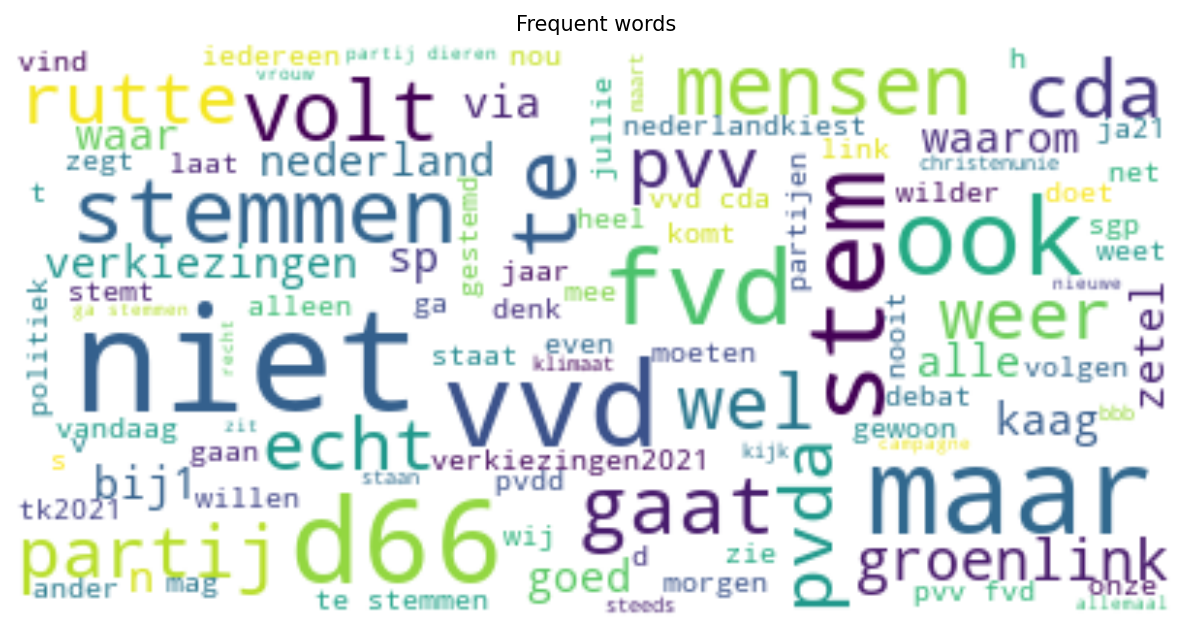

In [35]:
# Create a wordweb to explore the tweet texts

# Start with one:
tweet_All = " ".join(tweet for tweet in df.processed_text)

fig, ax = plt.subplots(figsize  = (10,10),dpi = 150)
# Create and generate a word cloud image:

wordcloud_ALL = WordCloud(max_font_size=50,
                          max_words=100,
                          background_color="white"#,
                          #stopwords=STOPWORDS.union(swords) # Change stopwords to suppress certain words in wordweb
                          ).generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('Frequent words', fontsize=15)
ax.axis('off')


#### Add party keywords
In order to parse out sentiment towards specific parties later, it is necessary to identify the mentions of parties in the tweet text, and to classify the tweets with a party tag.

<Figure size 1080x432 with 0 Axes>

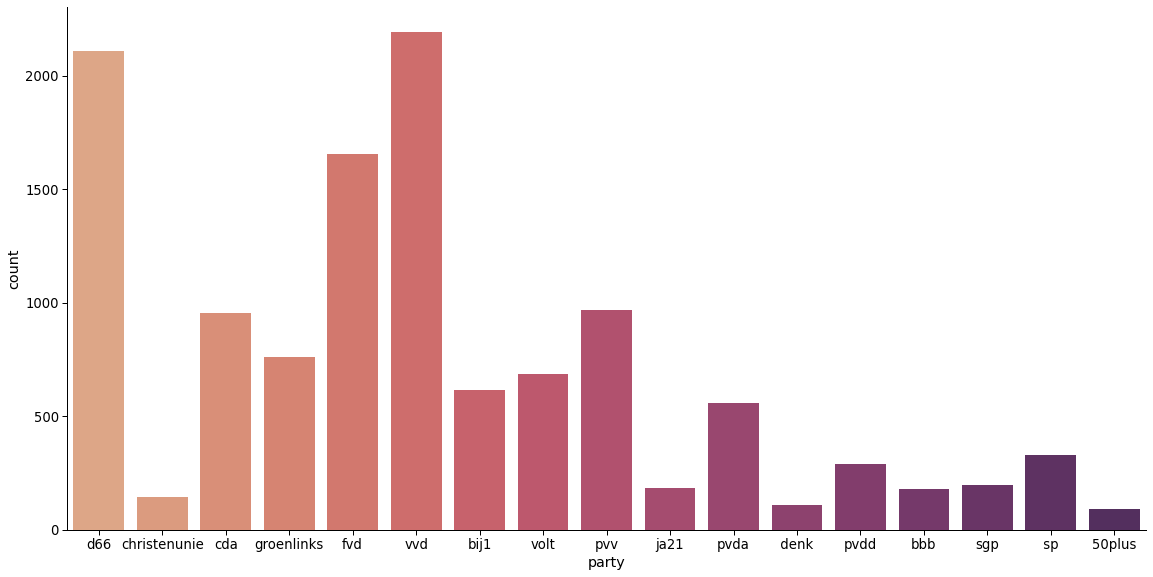

<Figure size 1080x432 with 0 Axes>

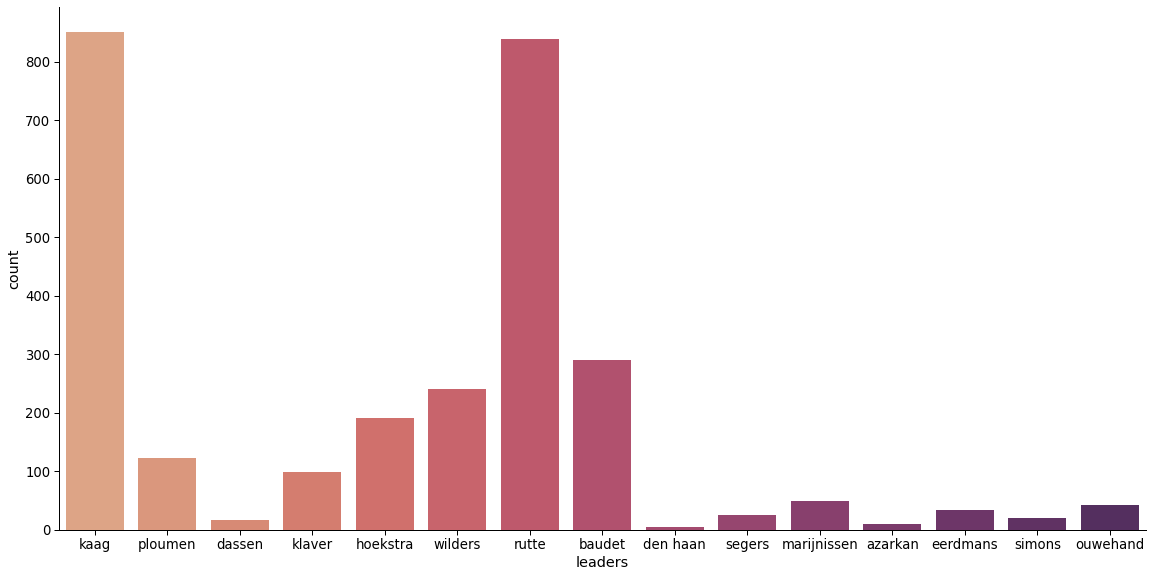

In [49]:
# Extract party mentions
df['party'] = df['processed_text'].str.extract('(fvd|vvd|cda|volt|d66|bij1|groenlinks|50plus| denk |bbb|christenunie|ja21|pvda|pvdd|pvv| sp |sgp)', flags=re.IGNORECASE)
df['party']

# Plot party counts
sns.set_context('paper', font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.catplot(x='party', kind="count", palette="flare", data=df, height = 8, aspect = 2)
df['party'].value_counts()

# Also extract party leaders for fun
df['leaders'] = df['processed_text'].str.extract('(baudet|rutte|hoekstra|segers|kaag|klaver|dassen|simons|den haan|azarkan|van der plas|eerdmans|ploumen|ouwehand|wilders|marijnissen|van der staaij)',flags=re.IGNORECASE)

# Plot party leaders
plt.figure(figsize=(15,6))
sns.catplot(x='leaders', kind="count", palette="flare", data=df, height = 8, aspect = 2)
df['leaders'].value_counts()

# Export cleaned df to csv
df.to_csv('cleaned_sentiment_tweets.csv', header=True, index=False)